## Code utilised in the experimentation chapter to simulate the operations of the devised AMM

Top Bids:
   Price        Size
0  39.99    4.200000
1  39.98   17.697167
2  39.97   13.290005
3  39.96   47.828142
4  39.95   41.660152
5  39.94   27.628426
6  39.93   20.100000
7  39.92  103.982831
8  39.91   39.925508
9  39.90   53.737729

Top Asks:
   Price       Size
0  40.01   4.200000
1  40.02   7.683909
2  40.03  26.718611
3  40.04  23.853138
4  40.05  33.961452
5  40.06  44.393797
6  40.07  25.814621
7  40.08  40.172998
8  40.09  65.027890
9  40.10  36.897375


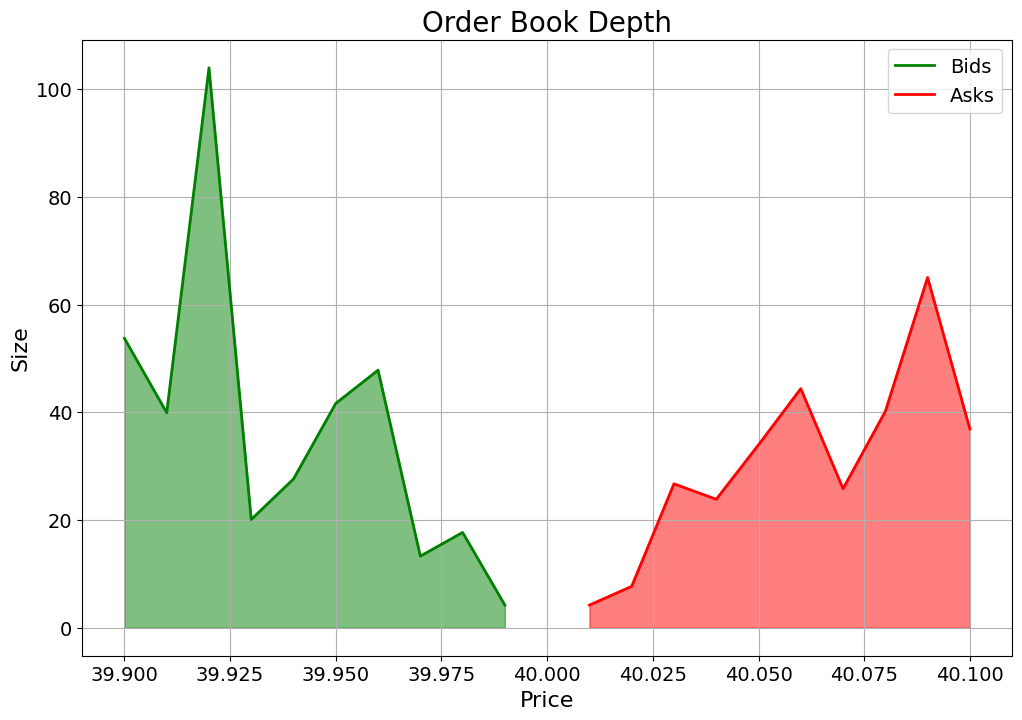

In [1]:
import ccxt
import pandas as pd
import matplotlib.pyplot as plt

# Function to fetch level 2 order book data
def fetch_order_book(exchange_id, symbol, limit=10):
    exchange_class = getattr(ccxt, exchange_id)
    exchange = exchange_class()
    order_book = exchange.fetch_order_book(symbol, limit)
    return order_book

# Function to display basic analytics
def display_analytics(order_book):
    bids = order_book['bids']
    asks = order_book['asks']
    
    bid_prices = [bid[0] for bid in bids]
    bid_sizes = [bid[1] for bid in bids]
    ask_prices = [ask[0] for ask in asks]
    ask_sizes = [ask[1] for ask in asks]

    bid_df = pd.DataFrame(bids, columns=['Price', 'Size'])
    ask_df = pd.DataFrame(asks, columns=['Price', 'Size'])
    
    # Display dataframes
    print("Top Bids:")
    print(bid_df)
    print("\nTop Asks:")
    print(ask_df)
    
    # Plot order book depth 
    plt.figure(figsize=(12, 8))  
    plt.plot(bid_prices, bid_sizes, color='green', label='Bids', linewidth=2)
    plt.plot(ask_prices, ask_sizes, color='red', label='Asks', linewidth=2)
    plt.fill_between(bid_prices, bid_sizes, color='green', alpha=0.5)
    plt.fill_between(ask_prices, ask_sizes, color='red', alpha=0.5)
    
    plt.xlabel('Price', fontsize=16)  
    plt.ylabel('Size', fontsize=16) 
    plt.title('Order Book Depth', fontsize=20)  
    plt.xticks(fontsize=14)  
    plt.yticks(fontsize=14)  
    plt.legend(fontsize=14)  
    plt.grid(True) 
    plt.show()
    
# Main function
def main():
    exchange_id = 'okx'
    symbol = 'BSV/USDT'
    order_book = fetch_order_book(exchange_id, symbol)
    display_analytics(order_book)

if __name__ == "__main__":
    main()

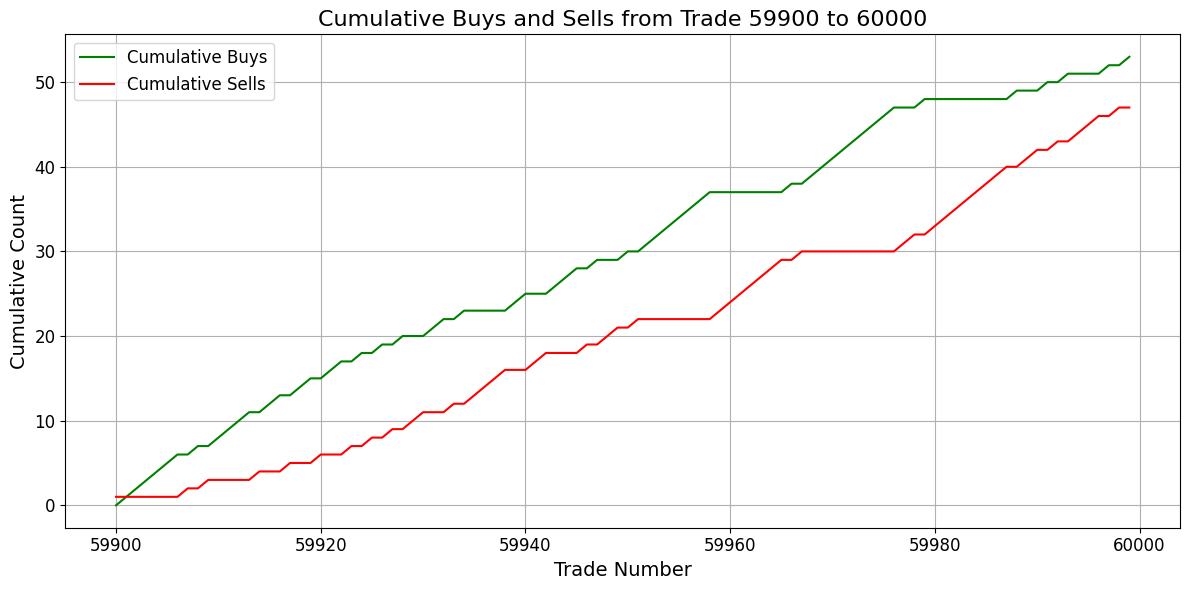

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to read trade data from CSV
def read_trade_data(file_path):
    df = pd.read_csv(file_path, header=None)
    return df

# Function to plot cumulative buys and sells within a specific trade range
def plot_cumulative_trades(trades, start, end):
    # Filter the range of trades
    trades = trades.iloc[start:end].copy()
    
    # Calculate cumulative buys and sells
    trades.loc[:, 'cumulative_buys'] = (trades[5] == 1).cumsum()
    trades.loc[:, 'cumulative_sells'] = (trades[5] == -1).cumsum()

    # Plot cumulative buys and sells
    plt.figure(figsize=(12, 6))
    plt.plot(trades.index, trades['cumulative_buys'], label='Cumulative Buys', color='green')
    plt.plot(trades.index, trades['cumulative_sells'], label='Cumulative Sells', color='red')
    plt.xlabel('Trade Number', fontsize=14, color='black')
    plt.ylabel('Cumulative Count', fontsize=14, color='black')
    plt.title(f'Cumulative Buys and Sells from Trade {start} to {end}', fontsize=16, color='black')
    plt.legend(fontsize=12)
    plt.tick_params(axis='x', labelsize=12, color='black')
    plt.tick_params(axis='y', labelsize=12, color='black')
    plt.grid(True)  # Add grid lines for better readability
    plt.tight_layout()
    plt.show()

# Main function
def main():
    file_path = 'Market_Execution_Data/ALCD_stream_800002.csv'
    trades = read_trade_data(file_path)
    
    # Plot only trades from 59,900 to 60,000
    plot_cumulative_trades(trades, 59900, 60000)

if __name__ == "__main__":
    main()


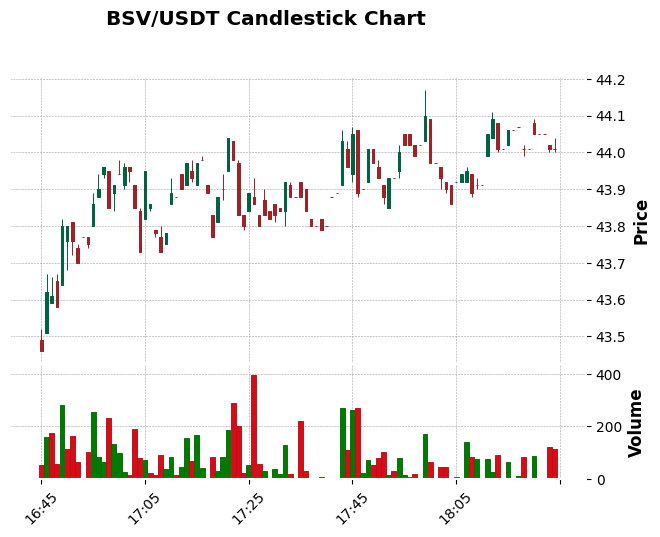

BSV/USDT Candlestick Chart - Specified Time Frame
Number of trades: 0
Total bought: 0.00 USD / 0.0000 units
Total sold: 0.00 USD / 0.0000 units



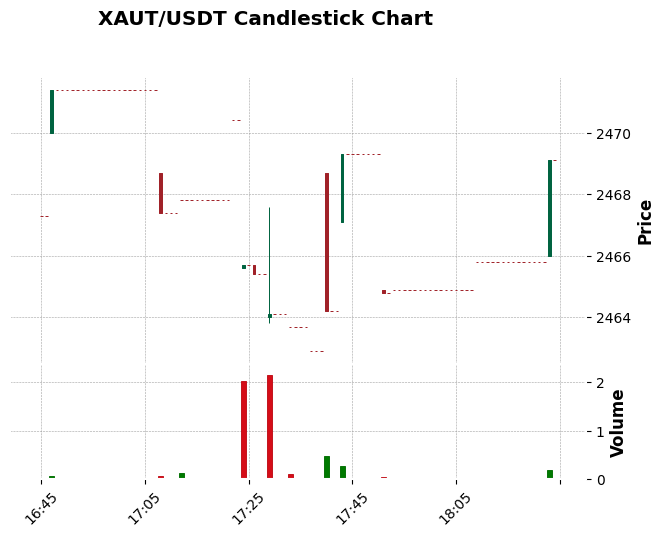

XAUT/USDT Candlestick Chart - Specified Time Frame
Number of trades: 0
Total bought: 0.00 USD / 0.0000 units
Total sold: 0.00 USD / 0.0000 units



C:\Users\lyakh\AppData\Local\Temp\ipykernel_34284\4135849822.py:85: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  xaut_usdt_stats[1] / bsv_usdt['close'][-1],
C:\Users\lyakh\AppData\Local\Temp\ipykernel_34284\4135849822.py:86: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  xaut_usdt_stats[2] / bsv_usdt['close'][-1],


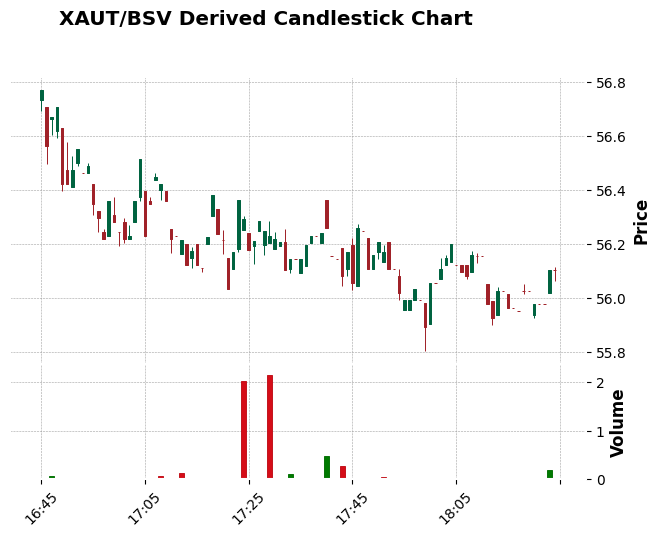

XAUT/BSV Derived Candlestick Chart - Specified Time Frame
Number of trades: 0
Total bought: 0.00 USD / 0.0000 units
Total sold: 0.00 USD / 0.0000 units



In [3]:
import ccxt
import pandas as pd
import mplfinance as mpf
from datetime import datetime, timedelta

# Function to fetch OHLCV data for a specific time range
def fetch_ohlcv(exchange, symbol, start_time, end_time, timeframe='1m'):
    since = exchange.parse8601(start_time.strftime('%Y-%m-%dT%H:%M:%SZ'))
    end = exchange.parse8601(end_time.strftime('%Y-%m-%dT%H:%M:%SZ'))
    ohlcv = exchange.fetch_ohlcv(symbol, timeframe=timeframe, since=since)
    
    # Filter data to include only the timeframe between start_time and end_time
    df = pd.DataFrame(ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    df.set_index('timestamp', inplace=True)
    df = df[(df.index >= start_time) & (df.index <= end_time)]
    
    return df

# Function to fetch recent trades
def fetch_recent_trades(exchange, symbol, start_time, end_time):
    since = exchange.parse8601(start_time.strftime('%Y-%m-%dT%H:%M:%SZ'))
    trades = exchange.fetch_trades(symbol, since=since)
    
    # Filter trades to include only the timeframe between start_time and end_time
    filtered_trades = [trade for trade in trades if start_time <= datetime.utcfromtimestamp(trade['timestamp'] / 1000) <= end_time]
    
    return filtered_trades

# Function to calculate trade statistics
def calculate_trade_stats(trades):
    total_trades = len(trades)
    total_bought_usd = sum(trade['price'] * trade['amount'] for trade in trades if trade['side'] == 'buy')
    total_sold_usd = sum(trade['price'] * trade['amount'] for trade in trades if trade['side'] == 'sell')
    total_bought_crypto = sum(trade['amount'] for trade in trades if trade['side'] == 'buy')
    total_sold_crypto = sum(trade['amount'] for trade in trades if trade['side'] == 'sell')

    return total_trades, total_bought_usd, total_sold_usd, total_bought_crypto, total_sold_crypto

# Function to calculate XAUT/BSV from XAUT/USDT and BSV/USDT
def calculate_xaut_bsv(xaut_usdt, bsv_usdt):
    xaut_bsv = xaut_usdt[['open', 'high', 'low', 'close']].div(bsv_usdt[['open', 'high', 'low', 'close']].values)
    xaut_bsv['volume'] = xaut_usdt['volume']  # Optionally adjust this to reflect XAUT/BSV trades
    return xaut_bsv

# Function to plot candlestick charts with trade stats
def plot_candlestick_chart(df, title, stats):
    mpf.plot(df, type='candle', style='charles', title=title, ylabel='Price', volume=True)
    
    print(f"{title} - Specified Time Frame")
    print(f"Number of trades: {stats[0]}")
    print(f"Total bought: {stats[1]:.2f} USD / {stats[3]:.4f} units")
    print(f"Total sold: {stats[2]:.2f} USD / {stats[4]:.4f} units\n")

def main():
    exchange_id = 'okx'
    exchange_class = getattr(ccxt, exchange_id)
    exchange = exchange_class()

    # Define the start and end time for the data fetch
    start_time = datetime(2024, 8, 13, 16, 45)
    end_time = datetime(2024, 8, 13, 18, 30)

    # Fetch data for BSV/USDT and XAUT/USDT
    bsv_usdt = fetch_ohlcv(exchange, 'BSV/USDT', start_time, end_time)
    xaut_usdt = fetch_ohlcv(exchange, 'XAUT/USDT', start_time, end_time)

    # Calculate XAUT/BSV
    xaut_bsv = calculate_xaut_bsv(xaut_usdt, bsv_usdt)

    # Fetch recent trades for the specified time frame
    bsv_usdt_trades = fetch_recent_trades(exchange, 'BSV/USDT', start_time, end_time)
    xaut_usdt_trades = fetch_recent_trades(exchange, 'XAUT/USDT', start_time, end_time)

    # Calculate trade stats
    bsv_usdt_stats = calculate_trade_stats(bsv_usdt_trades)
    xaut_usdt_stats = calculate_trade_stats(xaut_usdt_trades)

    # Plot each pair with trade stats
    plot_candlestick_chart(bsv_usdt, 'BSV/USDT Candlestick Chart', bsv_usdt_stats)
    plot_candlestick_chart(xaut_usdt, 'XAUT/USDT Candlestick Chart', xaut_usdt_stats)
    
    # Calculate and print the combined trades for XAUT/BSV
    xaut_bsv_stats = (bsv_usdt_stats[0] + xaut_usdt_stats[0], 
                      xaut_usdt_stats[1] / bsv_usdt['close'][-1], 
                      xaut_usdt_stats[2] / bsv_usdt['close'][-1], 
                      xaut_usdt_stats[3], 
                      xaut_usdt_stats[4])
    
    plot_candlestick_chart(xaut_bsv, 'XAUT/BSV Derived Candlestick Chart', xaut_bsv_stats)

if __name__ == "__main__":
    main()


In [4]:
import ccxt

# Function to fetch the order book
def fetch_order_book(exchange_id, symbol, limit=50):
    exchange_class = getattr(ccxt, exchange_id)
    exchange = exchange_class()
    order_book = exchange.fetch_order_book(symbol, limit=limit)
    return order_book

# Function to combine order books for XAUT/BSV
def combine_order_books(xaut_usdt, bsv_usdt):
    xaut_bsv_bids = []
    xaut_bsv_asks = []

    # Combine bids
    for price_usdt, size in xaut_usdt['bids']:
        bsv_price = price_usdt / bsv_usdt['asks'][0][0]
        xaut_bsv_bids.append([bsv_price, size])

    # Combine asks
    for price_usdt, size in xaut_usdt['asks']:
        bsv_price = price_usdt / bsv_usdt['bids'][0][0]
        xaut_bsv_asks.append([bsv_price, size])

    xaut_bsv_bids = sorted(xaut_bsv_bids, key=lambda x: x[0], reverse=True)
    xaut_bsv_asks = sorted(xaut_bsv_asks, key=lambda x: x[0])

    return {
        'bids': xaut_bsv_bids,
        'asks': xaut_bsv_asks
    }

# Function to print the top 50 orders
def print_top_orders(order_book, symbol):
    print(f"Top 50 orders for {symbol}:\n")
    
    print("Bids:")
    for i, order in enumerate(order_book['bids'][:50]):
        print(f"{i + 1}: Price: {order[0]:.8f} BSV, Size: {order[1]:.8f} XAUT")
    
    print("\nAsks:")
    for i, order in enumerate(order_book['asks'][:50]):
        print(f"{i + 1}: Price: {order[0]:.8f} BSV, Size: {order[1]:.8f} XAUT")

# Main function
def main():
    exchange_id = 'okx'
    
    # Fetch order books for XAUT/USDT and BSV/USDT
    xaut_usdt = fetch_order_book(exchange_id, 'XAUT/USDT')
    bsv_usdt = fetch_order_book(exchange_id, 'BSV/USDT')

    # Combine order books to create XAUT/BSV
    xaut_bsv = combine_order_books(xaut_usdt, bsv_usdt)

    # Print the top 50 orders for XAUT/BSV
    print_top_orders(xaut_bsv, 'XAUT/BSV')

if __name__ == "__main__":
    main()


Top 50 orders for XAUT/BSV:

Bids:
1: Price: 62.50937266 BSV, Size: 0.52515200 XAUT
2: Price: 62.50687328 BSV, Size: 0.02895000 XAUT
3: Price: 62.48687828 BSV, Size: 0.04074900 XAUT
4: Price: 62.48437891 BSV, Size: 0.04280700 XAUT
5: Price: 62.46688328 BSV, Size: 2.50000000 XAUT
6: Price: 62.46438390 BSV, Size: 7.07431300 XAUT
7: Price: 62.43189203 BSV, Size: 10.61316200 XAUT
8: Price: 62.40189953 BSV, Size: 0.00395400 XAUT
9: Price: 62.39690077 BSV, Size: 17.14877200 XAUT
10: Price: 62.36440890 BSV, Size: 0.00122000 XAUT
11: Price: 62.35941015 BSV, Size: 0.00400800 XAUT
12: Price: 62.32691827 BSV, Size: 24.76494900 XAUT
13: Price: 62.30442389 BSV, Size: 5.00000000 XAUT
14: Price: 62.25943514 BSV, Size: 0.01605700 XAUT
15: Price: 62.23444139 BSV, Size: 2.02008000 XAUT
16: Price: 62.23194201 BSV, Size: 0.00436100 XAUT
17: Price: 62.22444389 BSV, Size: 31.86082600 XAUT
18: Price: 62.19195201 BSV, Size: 0.00122000 XAUT
19: Price: 62.18445389 BSV, Size: 0.05027600 XAUT
20: Price: 62.179455

Trade 1:
Timestamp: 2024-08-13 16:45:00
Action: Sold 0.1000 XAUT
XAUT Balance: 100000.1000
BSV Balance: 5610310.2270
XAUT/BSV Price: 56.1030
BSV Price Before Trade: 43.4600 USDT
XAUT Price Before Trade: 2467.3000 USDT
BSV Price After Trade: 43.6200 USDT
XAUT Price After Trade: 2467.3000 USDT
Cost in BSV: 5.6103 BSV
Cost in USD: 243.8241 USD

Trade 2:
Timestamp: 2024-08-13 16:46:00
Action: Bought 0.1000 XAUT
XAUT Balance: 99999.9992
BSV Balance: 5610315.8833
XAUT/BSV Price: 56.1032
BSV Price Before Trade: 43.6200 USDT
XAUT Price Before Trade: 2467.3000 USDT
BSV Price After Trade: 43.6100 USDT
XAUT Price After Trade: 2471.4000 USDT
Cost in BSV: 5.6103 BSV
Cost in USD: 246.7300 USD

Trade 3:
Timestamp: 2024-08-13 16:47:00
Action: Bought 0.0579 XAUT
XAUT Balance: 99999.9407
BSV Balance: 5610319.1621
XAUT/BSV Price: 56.1032
BSV Price Before Trade: 43.6100 USDT
XAUT Price Before Trade: 2471.4000 USDT
BSV Price After Trade: 43.5800 USDT
XAUT Price After Trade: 2471.4000 USDT
Cost in BSV: 5.61

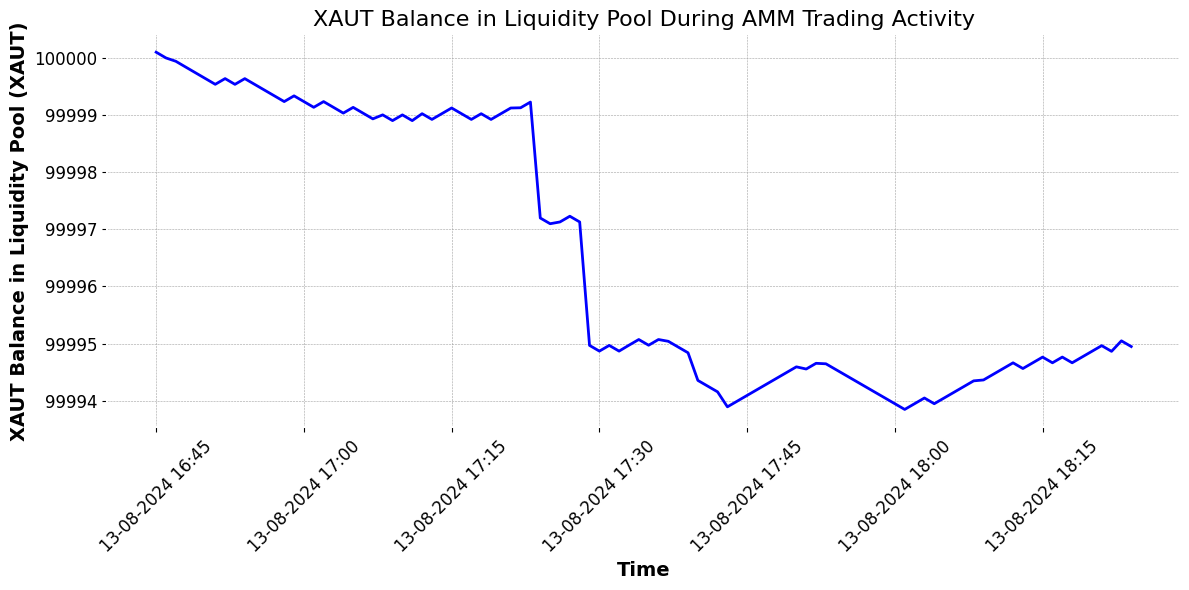

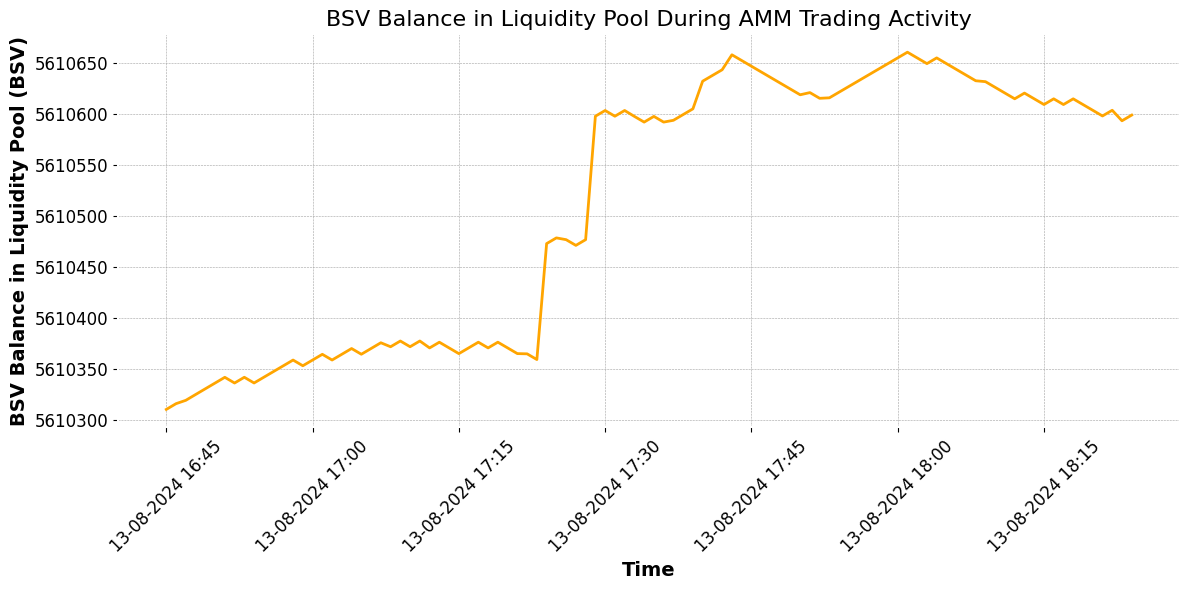

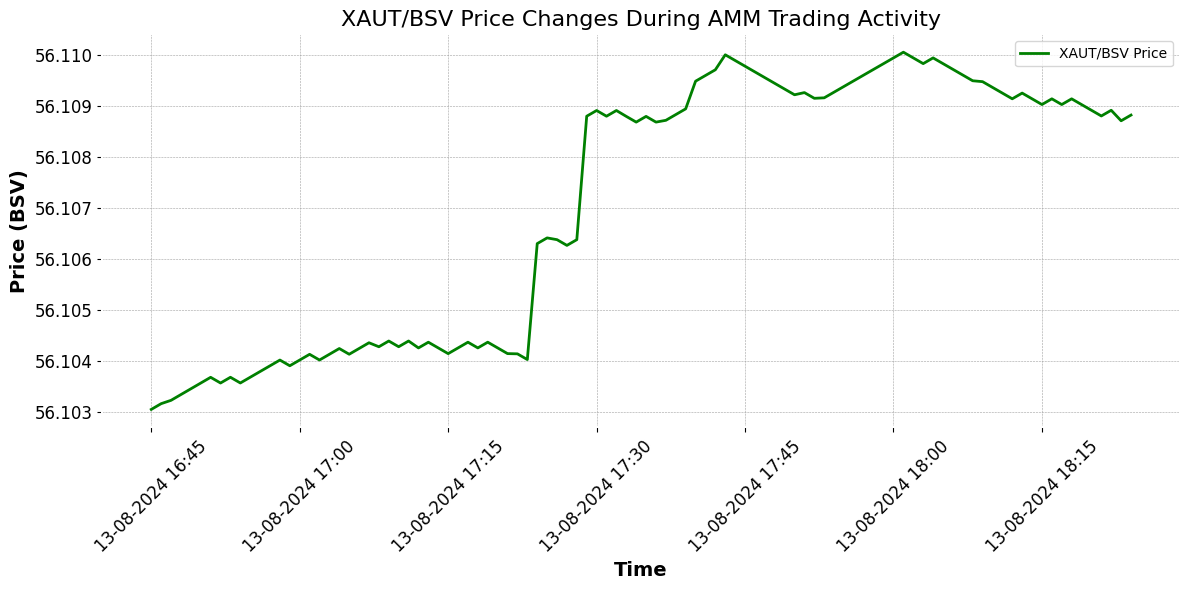

Initial LP Positions:
LP1 - XAUT: 60000.0600, BSV: 3366186.1362
LP2 - XAUT: 30000.0300, BSV: 1683093.0681
LP3 - XAUT: 10000.0100, BSV: 561031.0227

LP Earnings and Final Positions After 100 Trades:
LP1:
  BSV Earned: 1.4150 BSV (~62.27 USDT)
  Initial XAUT/BSV Ratio: 60000.0600 / 3366186.1362
  Final XAUT/BSV Ratio: 59996.9688 / 3366359.5729
  Total Earnings from Fees in USD: 62.27 USDT

LP2:
  BSV Earned: 0.7075 BSV (~31.14 USDT)
  Initial XAUT/BSV Ratio: 30000.0300 / 1683093.0681
  Final XAUT/BSV Ratio: 29998.4844 / 1683179.7864
  Total Earnings from Fees in USD: 31.14 USDT

LP3:
  BSV Earned: 0.2358 BSV (~10.38 USDT)
  Initial XAUT/BSV Ratio: 10000.0100 / 561031.0227
  Final XAUT/BSV Ratio: 9999.4948 / 561059.9288
  Total Earnings from Fees in USD: 10.38 USDT

Total value of LPs' assets before 100 trades: 493820000.0002 USD
Total value of LPs' assets after 100 trades: 493820000.6302 USD


In [5]:
import ccxt
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates

# Function to fetch trade data from OKX starting from a specific time
def fetch_trade_data(exchange_id, symbol, start_time, timeframe='1m', limit=60):
    exchange_class = getattr(ccxt, exchange_id)
    exchange = exchange_class()

    # Convert start time to a Unix timestamp in milliseconds
    since = int(datetime.strptime(start_time, '%d/%m/%Y %H:%M').timestamp() * 1000)

    # Fetch the OHLCV data starting from the 'since' timestamp
    ohlcv = exchange.fetch_ohlcv(symbol, timeframe=timeframe, since=since, limit=limit)
    
    return ohlcv

# Function to create XAUT/BSV pair using XAUT/USDT and BSV/USDT
def create_xaut_bsv_pair(xaut_usdt, bsv_usdt):
    xaut_bsv = []
    for i in range(min(len(xaut_usdt), len(bsv_usdt))):
        xaut_usdt_price = xaut_usdt[i][4]
        bsv_usdt_price = bsv_usdt[i][4]
        xaut_bsv_price = xaut_usdt_price / bsv_usdt_price
        xaut_bsv.append([xaut_usdt[i][0], xaut_bsv_price, xaut_usdt[i][5]])
    return xaut_bsv

# Function to plot AMM balance changes for XAUT and BSV in separate plots
def plot_amm_balances_separate(df):
    # Define the date format to include day, month, and year
    date_format = mdates.DateFormatter('%d-%m-%Y %H:%M')

    # Plot XAUT balance
    plt.figure(figsize=(12, 6))
    plt.ticklabel_format(useOffset=False)
    plt.plot(df['timestamp'], df['xaut_balance'], label='XAUT Balance', color='blue')
    plt.xlabel('Time', fontsize=14, color='black')
    plt.ylabel('XAUT Balance in Liquidity Pool (XAUT)', fontsize=14, color='black')
    plt.tick_params(axis='y', labelcolor='black', labelsize=12)
    plt.tick_params(axis='x', labelsize=12, color='black')
    plt.gca().xaxis.set_major_formatter(date_format)
    plt.gca().xaxis.set_tick_params(rotation=45)
    plt.gca().ticklabel_format(style='plain', axis='y')  # Ensure that the y-axis does not use scientific notation
    plt.title('XAUT Balance in Liquidity Pool During AMM Trading Activity', fontsize=16, color='black')
    plt.grid(True)  # Add grid lines
    plt.tight_layout()
    plt.show()

    # Plot BSV balance
    plt.figure(figsize=(12, 6))
    plt.ticklabel_format(useOffset=False)
    plt.plot(df['timestamp'], df['bsv_balance'], label='BSV Balance', color='orange')
    plt.xlabel('Time', fontsize=14, color='black')
    plt.ylabel('BSV Balance in Liquidity Pool (BSV)', fontsize=14, color='black')
    plt.tick_params(axis='y', labelcolor='black', labelsize=12)
    plt.tick_params(axis='x', labelsize=12, color='black')
    plt.gca().xaxis.set_major_formatter(date_format)
    plt.gca().xaxis.set_tick_params(rotation=45)
    plt.gca().ticklabel_format(style='plain', axis='y')  # Ensure that the y-axis does not use scientific notation
    plt.title('BSV Balance in Liquidity Pool During AMM Trading Activity', fontsize=16, color='black')
    plt.grid(True) 
    plt.tight_layout()
    plt.show()

# Function to plot XAUT/BSV price changes
def plot_price_changes(df, symbol):
    # Define the date format to include day, month, and year
    date_format = mdates.DateFormatter('%d-%m-%Y %H:%M')

    plt.figure(figsize=(12, 6))
    plt.plot(df['timestamp'], df['price'], label='XAUT/BSV Price', color='green')
    plt.xlabel('Time', fontsize=14, color='black')
    plt.ylabel('Price (BSV)', fontsize=14, color='black')
    plt.tick_params(axis='y', labelcolor='black', labelsize=12)
    plt.tick_params(axis='x', labelsize=12, color='black')
    plt.gca().xaxis.set_major_formatter(date_format)
    plt.gca().xaxis.set_tick_params(rotation=45)
    plt.title(f'XAUT/BSV Price Changes During AMM Trading Activity', fontsize=16, color='black')
    plt.legend()
    plt.grid(True)  # Add grid lines
    plt.tight_layout()
    plt.show()

def simulate_amm_trades(trades, orders, initial_xaut, initial_price, xaut_usdt, bsv_usdt):

    # Initialize the XAUT and BSV balances and the constant product k
    xaut_balance = initial_xaut
    bsv_balance = initial_xaut * initial_price
    k = xaut_balance * bsv_balance  # Constant product formula (k = x * y)

    balances = []
    prices = []

    total_trades = 0
    total_volume_bsv = 0
    total_volume_usd = 0
    largest_trade_usd = 0
    smallest_trade_usd = float('inf')

    for i in range(min(len(orders), len(trades))):
        timestamp, close_price, _ = trades[i]
        action = "Sold" if orders[i] == -1 else "Bought"
        volume_xaut = abs(trades[i][2])

        # Ensure the volume is at least 0.1 XAUT
        if volume_xaut == 0:
            volume_xaut = 0.1

        # Store the balances before the trade for calculations
        bsv_balance_before = bsv_balance
        xaut_balance_before = xaut_balance

        # Get the prices in USDT before the trade
        bsv_price_before = bsv_usdt[i][4]
        xaut_price_before = xaut_usdt[i][4]

        if orders[i] == -1:  # Sell XAUT for BSV
            xaut_balance += volume_xaut  # Increase XAUT balance
            bsv_balance = k / xaut_balance  # Recalculate BSV balance using constant product formula (y' = k / x')
            bsv_received = bsv_balance_before - bsv_balance  # BSV received from the trade
            cost_usd = bsv_received * bsv_price_before  # Convert BSV to USD based on BSV price in USD
        else:  # Buy XAUT with BSV
            bsv_spent = volume_xaut * close_price  # BSV spent to buy the specified amount of XAUT
            xaut_balance = k / (bsv_balance + bsv_spent)  # Recalculate XAUT balance using constant product formula (x' = k / y')
            bsv_balance += bsv_spent  # Increase BSV balance by the spent amount
            cost_usd = bsv_spent * bsv_price_before  # Convert BSV to USD based on BSV price in USD

        # Update the invariant k (for validation, k should remain consistent)
        k = xaut_balance * bsv_balance  # Constant product formula (k = x' * y')

        # Calculate the new price of XAUT/BSV
        new_price = bsv_balance / xaut_balance  # Price calculation based on new balances

        # Get the prices in USDT after the trade
        bsv_price_after = bsv_usdt[i + 1][4] if i + 1 < len(bsv_usdt) else bsv_price_before
        xaut_price_after = xaut_usdt[i + 1][4] if i + 1 < len(xaut_usdt) else xaut_price_before

        # Print the current state
        print(f"Trade {i + 1}:")
        print(f"Timestamp: {datetime.utcfromtimestamp(timestamp / 1000)}")
        print(f"Action: {action} {volume_xaut:.4f} XAUT")
        print(f"XAUT Balance: {xaut_balance:.4f}")
        print(f"BSV Balance: {bsv_balance:.4f}")
        print(f"XAUT/BSV Price: {new_price:.4f}")
        print(f"BSV Price Before Trade: {bsv_price_before:.4f} USDT")
        print(f"XAUT Price Before Trade: {xaut_price_before:.4f} USDT")
        print(f"BSV Price After Trade: {bsv_price_after:.4f} USDT")
        print(f"XAUT Price After Trade: {xaut_price_after:.4f} USDT")
        print(f"Cost in BSV: {bsv_received:.4f} BSV")
        print(f"Cost in USD: {cost_usd:.4f} USD\n")

        # Track trade statistics
        total_trades += 1
        total_volume_bsv += bsv_received
        total_volume_usd += cost_usd
        largest_trade_usd = max(largest_trade_usd, cost_usd)
        smallest_trade_usd = min(smallest_trade_usd, cost_usd)

        balances.append((timestamp, xaut_balance, bsv_balance))
        prices.append((timestamp, new_price))

    # After all trades are done, print trade statistics
    print("Trade Summary:")
    print(f"Total number of trades: {total_trades}")
    print(f"Total trade volume in BSV: {total_volume_bsv:.4f} BSV")
    print(f"Total trade volume in USD: {total_volume_usd:.4f} USD")
    print(f"Largest trade in USD: {largest_trade_usd:.4f} USD")
    print(f"Smallest trade in USD: {smallest_trade_usd:.4f} USD\n")

    return balances, prices


def calculate_lp_values(balances, bsv_to_usdt, xaut_to_usdt, lp_stakes):
    total_value_before_usd = 0
    total_value_after_usd = 0
    
    for lp, stake in lp_stakes.items():
        xaut_balance_initial = balances[0][1] * stake
        bsv_balance_initial = balances[0][2] * stake
        
        xaut_balance_final = balances[-1][1] * stake
        bsv_balance_final = balances[-1][2] * stake
        
        value_before_usd = (xaut_balance_initial * xaut_to_usdt) + (bsv_balance_initial * bsv_to_usdt)
        value_after_usd = (xaut_balance_final * xaut_to_usdt) + (bsv_balance_final * bsv_to_usdt)
        
        total_value_before_usd += value_before_usd
        total_value_after_usd += value_after_usd
    
    print(f"Total value of LPs' assets before 100 trades: {total_value_before_usd:.4f} USD")
    print(f"Total value of LPs' assets after 100 trades: {total_value_after_usd:.4f} USD")

def calculate_fees_and_positions(balances, orders, xaut_to_usdt, bsv_to_usdt, fee_rate=0.003):
    # Initial LP stakes
    lp_stakes = {
        "LP1": 0.60,  # 60%
        "LP2": 0.30,  # 30%
        "LP3": 0.10   # 10%
    }

    # Initial LP earnings in BSV
    lp_earnings_bsv = {
        "LP1": 0.0,
        "LP2": 0.0,
        "LP3": 0.0
    }

    # Initial LP balances based on their stakes
    lp_initial_balances = {
        "LP1": {"xaut": balances[0][1] * lp_stakes["LP1"], "bsv": balances[0][2] * lp_stakes["LP1"]},
        "LP2": {"xaut": balances[0][1] * lp_stakes["LP2"], "bsv": balances[0][2] * lp_stakes["LP2"]},
        "LP3": {"xaut": balances[0][1] * lp_stakes["LP3"], "bsv": balances[0][2] * lp_stakes["LP3"]}
    }

    # Print initial LP positions
    print("Initial LP Positions:")
    for lp, balance in lp_initial_balances.items():
        print(f"{lp} - XAUT: {balance['xaut']:.4f}, BSV: {balance['bsv']:.4f}")

    # Loop through each trade to calculate fees and update LP earnings
    for i in range(len(balances) - 1):
        bsv_balance_before = balances[i][2]
        bsv_balance_after = balances[i + 1][2]

        bsv_traded = abs(bsv_balance_after - bsv_balance_before)

        # Fees are always paid in BSV
        fee_bsv = bsv_traded * fee_rate
        if orders[i] == -1 or orders[i] == 1:  # Both buy and sell involve BSV
            for lp in lp_earnings_bsv:
                lp_earnings_bsv[lp] += fee_bsv * lp_stakes[lp]

    # Calculate final LP balances after 100 trades
    lp_final_balances = {
        "LP1": {"xaut": balances[-1][1] * lp_stakes["LP1"], "bsv": balances[-1][2] * lp_stakes["LP1"]},
        "LP2": {"xaut": balances[-1][1] * lp_stakes["LP2"], "bsv": balances[-1][2] * lp_stakes["LP2"]},
        "LP3": {"xaut": balances[-1][1] * lp_stakes["LP3"], "bsv": balances[-1][2] * lp_stakes["LP3"]}
    }

    # Print earnings and final positions for each LP
    print("\nLP Earnings and Final Positions After 100 Trades:")
    for lp in lp_earnings_bsv:
        earnings_usdt = lp_earnings_bsv[lp] * bsv_to_usdt
        print(f"{lp}:")
        print(f"  BSV Earned: {lp_earnings_bsv[lp]:.4f} BSV (~{earnings_usdt:.2f} USDT)")
        print(f"  Initial XAUT/BSV Ratio: {lp_initial_balances[lp]['xaut']:.4f} / {lp_initial_balances[lp]['bsv']:.4f}")
        print(f"  Final XAUT/BSV Ratio: {lp_final_balances[lp]['xaut']:.4f} / {lp_final_balances[lp]['bsv']:.4f}")
        print(f"  Total Earnings from Fees in USD: {earnings_usdt:.2f} USDT\n")

    # Calculate and print the total value of LPs' assets before and after the trades
    calculate_lp_values(balances, bsv_to_usdt, xaut_to_usdt, lp_stakes)

# Main function
def main():
    exchange_id = 'okx'
    xaut_usdt_symbol = 'XAUT/USDT'
    bsv_usdt_symbol = 'BSV/USDT'

    # Fetch trade data for XAUT/USDT and BSV/USDT starting from 13/08/2024 16:45
    start_time = '13/08/2024 17:45'
    xaut_usdt_data = fetch_trade_data(exchange_id, xaut_usdt_symbol, start_time, timeframe='1m', limit=100)
    bsv_usdt_data = fetch_trade_data(exchange_id, bsv_usdt_symbol, start_time, timeframe='1m', limit=100)

    # Create XAUT/BSV pair data
    xaut_bsv_data = create_xaut_bsv_pair(xaut_usdt_data, bsv_usdt_data)

    # Load order stream data and extract the relevant range
    order_stream = pd.read_csv('Market_Execution_Data/ALCD_stream_800002.csv', header=None)
    orders = order_stream.iloc[59900:60000, 5].values

    # Get the latest price from the last trade
    latest_trade = xaut_bsv_data[-1]
    latest_price = latest_trade[1]

    # Initial balances for the AMM
    initial_xaut = 100000
    initial_price = latest_price

    balances, prices = simulate_amm_trades(xaut_bsv_data[:100], orders, initial_xaut, initial_price, xaut_usdt_data, bsv_usdt_data)

    # Convert balances and prices to DataFrame
    df_balances = pd.DataFrame(balances, columns=['timestamp', 'xaut_balance', 'bsv_balance'])
    df_prices = pd.DataFrame(prices, columns=['timestamp', 'price'])

    # Convert timestamp to datetime
    df_balances['timestamp'] = pd.to_datetime(df_balances['timestamp'], unit='ms')
    df_prices['timestamp'] = pd.to_datetime(df_prices['timestamp'], unit='ms')

    # Plot the balances and price changes
    plot_amm_balances_separate(df_balances)
    plot_price_changes(df_prices, 'XAUT/BSV')

    # Example values for conversion rates based on the last fetched prices
    xaut_to_usdt = xaut_usdt_data[-1][4]
    bsv_to_usdt = bsv_usdt_data[-1][4]

    # Calculate and print liquidity provider earnings and asset values before and after trades
    calculate_fees_and_positions(balances, orders, xaut_to_usdt, bsv_to_usdt)

if __name__ == "__main__":
    main()
